In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

2023-12-05 09:33:00.423090: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 09:33:00.883862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 09:33:00.883967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 09:33:00.939121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 09:33:01.233359: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data = pd.read_csv("preprocessing.csv", index_col=0)
data.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,Employed
0,0,4,7,4,51552,4,0
1,0,3,12,5,46482,12,1
2,0,4,15,6,77290,7,0
3,0,3,9,6,46135,13,0
4,1,5,40,30,160932,2,0
5,0,4,9,2,38915,5,0
6,1,4,26,18,77831,17,1
7,0,4,14,5,81319,4,0
8,1,3,39,21,68507,3,0
9,1,4,20,16,37752,6,0


In [3]:
df_x = data[["Age", "EdLevel", "YearsExp", "YearsProExp", "PreviousSalary", "NumSkills"]]
df_x['sum_exp']=df_x["YearsExp"]+df_x["YearsProExp"]
df_x.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,sum_exp
0,0,4,7,4,51552,4,11
1,0,3,12,5,46482,12,17
2,0,4,15,6,77290,7,21
3,0,3,9,6,46135,13,15
4,1,5,40,30,160932,2,70
5,0,4,9,2,38915,5,11
6,1,4,26,18,77831,17,44
7,0,4,14,5,81319,4,19
8,1,3,39,21,68507,3,60
9,1,4,20,16,37752,6,36


In [4]:
df_y = data[["Employed"]]
df_y.head(10)

,Employed
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

print(f"Data before splitting: {len(df_x)}")
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_valid)}")

Data before splitting: 73462
Train data: 58769
Validation data: 14693


In [12]:
EPOCH = 15
LEARNING_RATE = 1e-3

In [15]:
len_feature = len(df_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
# col_train=["Age", "EdLevel", "YearsExp", "YearsProExp", "NumSkills", "sum_exp"]
col_train=["Age", "EdLevel", "NumSkills", "sum_exp"]
history = model.fit(x_train[col_train], y_train, epochs=EPOCH, validation_data=(x_valid[col_train], y_valid))

Epoch 1/15
1837/1837 [==============================] - 14s 7ms/step - loss: 0.5543 - accuracy: 0.7159 - val_loss: 0.4849 - val_accuracy: 0.7797
Epoch 2/15
1837/1837 [==============================] - 13s 7ms/step - loss: 0.4680 - accuracy: 0.7821 - val_loss: 0.4597 - val_accuracy: 0.7842
Epoch 3/15
1837/1837 [==============================] - 12s 7ms/step - loss: 0.4567 - accuracy: 0.7808 - val_loss: 0.4548 - val_accuracy: 0.7838
Epoch 4/15
1837/1837 [==============================] - 12s 7ms/step - loss: 0.4532 - accuracy: 0.7822 - val_loss: 0.4505 - val_accuracy: 0.7806
Epoch 5/15
1837/1837 [==============================] - 12s 7ms/step - loss: 0.4518 - accuracy: 0.7817 - val_loss: 0.4495 - val_accuracy: 0.7847
Epoch 6/15
1837/1837 [==============================] - 12s 7ms/step - loss: 0.4509 - accuracy: 0.7814 - val_loss: 0.4507 - val_accuracy: 0.7784
Epoch 7/15
1837/1837 [==============================] - 12s 7ms/step - loss: 0.4506 - accuracy: 0.7819 - val_loss: 0.4478 - val_ac

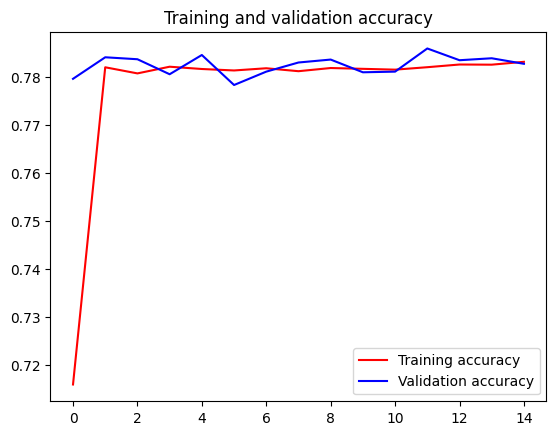

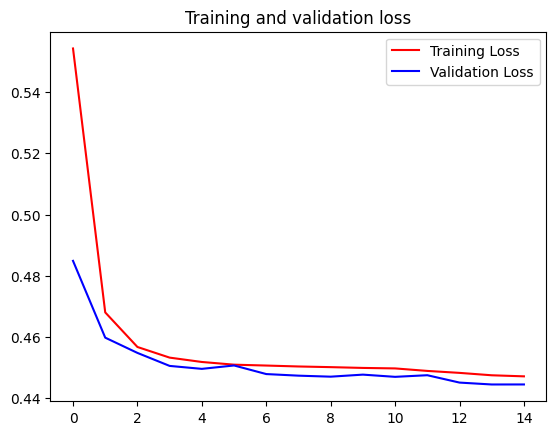

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
saved_model = "model.h5"
model.save(saved_model)